ЛАБОРАТОРНАЯ РАБОТА 3.

РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ

ПРЯМЫМИ МЕТОДАМИ. ТЕОРИЯ ВОЗМУЩЕНИЙ

Вариант №17

Плешко Георгий,БПМ-161

Задания 3.1.17, 3.5.5, 3.9.4**

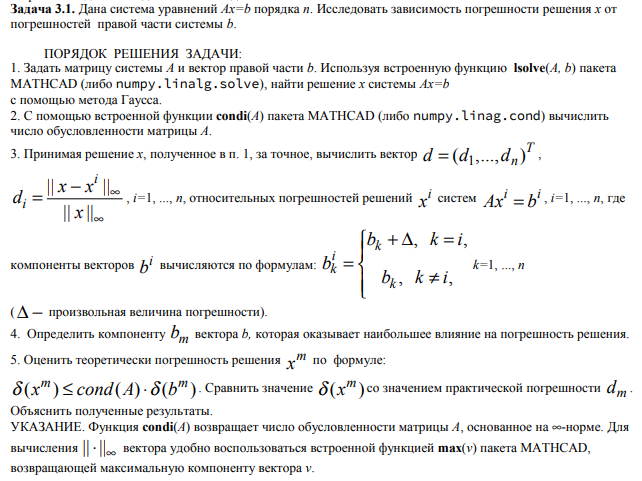

In [47]:
from IPython.display import Image
Image("31.png")

In [15]:
#Задание матрицы системы A

import numpy as np 
n1 = 4
n2 = 17
def c(i,j):
    return 0.1 * n2 * i * j
A = np.array([[115/(3*c(i+1,j+1)+4*(c(i+1,j+1)**3)) for j in range(n1)]for i in range (n1)])
print(A)

[[4.64608920e+00 6.86911645e-01 2.10659750e-01 8.99753389e-02]
 [6.86911645e-01 8.99753389e-02 2.68978667e-02 1.13831812e-02]
 [2.10659750e-01 2.68978667e-02 8.00155411e-03 3.38037880e-03]
 [8.99753389e-02 1.13831812e-02 3.38037880e-03 1.42722059e-03]]


In [4]:
#Задание вектора правой части b
b = np.array([float(n2)for i in range(n1)])
b = b.reshape(4,1)
print(b)

[[17.]
 [17.]
 [17.]
 [17.]]


x = np.linalg.solve(A,b)
print(x)

In [5]:
#Находим решение системы методом Гаусса и число обусловленности
x = np.linalg.solve(A,b)
print(x)
ch = np.linalg.cond(A)
print(ch)

[[ 1.27035523e+06]
 [-2.54800237e+08]
 [ 2.66524859e+09]
 [-4.36050058e+09]]
3757715783.602947


In [21]:
delt = 0.001 #произвольная величина
def d_vec(A, b): #вычисление вектора d(вектор относительных погрешностей решений)
    d = np.ones(n1)
    for i in range(n1):
        b_i = np.ones(n1)
        for j in range(n1):
            if (j == i):
                b_i[j] = b[j]+delt
            else:
                b_i[j] = b[j]
        x_i = np.linalg.solve(A, b_i)
        d_i = np.linalg.norm(x-x_i, np.inf)/np.linalg.norm(x, np.inf)
        d[i] = d_i
    return d
d = d_vec(A,b)
print("Полученный вектор d")
print(d)
#Определеяем компоненту bm вектора b,больше всего влияющую на погрешность решения
d_ot = []
for i in range(n1):
    b_m = np.ones(n1)*n2
    b_m[i] += 1
    d_ot.append(np.linalg.norm(d_vec(A, b_m)))

print("Нормы вектора d")
print(d_ot)
max_v = max(d_ot)
max_ind = d_ot.index(max_v)
print("Компонента вектора,влияющая больше всего(если начинаем с компоненты номер 0)")
print(max_ind)

Полученный вектор d
[3.55308301 3.5530949  3.55311895 3.55328729]
Нормы вектора d
[7.1062807349276325, 7.130023698435645, 7.178061707932989, 7.514800211473671]
Компонента вектора,влияющая больше всего(если начинаем с компоненты номер 0)
3


In [26]:
b_m = np.ones(n1)
for j in range(n1):
    if (j == i):
        b_m[j] = b[j]+delt
    else:
        b_m[j] = b[j]
x_m = np.linalg.solve(A, b_m)
print("x = ", x_m)

dlt_m = np.linalg.norm(b-b_m, np.inf)/np.linalg.norm(b, np.inf)

print("Теоретическая",dlt_m*ch) 
print("Практическая", d[max_ind])
print(d[max_ind]<dlt_m*ch)
print("Практическая погрешность получилась меньше теоретической.Большую величину теоретической погрешности можно объяснить большим числом обусловленности матрицы СЛАУ")

x =  [ 1.27052066e+06 -2.54833690e+08  2.66559904e+09 -4.36107424e+09]
Теоретическая 221042.10491809057
Практическая 3.5532872867088527
True
Практическая погрешность получилась меньше теоретической.Большую величину теоретической погрешности можно объяснить большим числом обусловленности матрицы СЛАУ


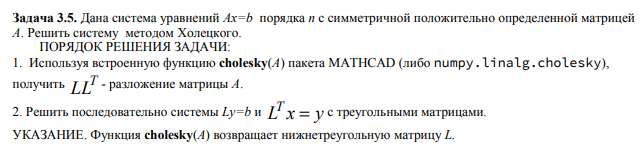

In [48]:
Image("35.png")

In [30]:
n = 30
m = 20
A = np.zeros((n,n))
b = np.zeros(n)
for i in range (1,n+1):
    for j in range (1,n+1):
        if i != j:
            A[i-1][j-1] = (i+j)/(m+n)
        else:
            A[i-1][j-1] = n + m*m + j/m + i/n
    b[i-1] = m*i + n
L = np.linalg.cholesky(A)
 = np.linalg.solve(L,b)
x = np.linalg.solve(np.transpose(L),y)
if (np.allclose(np.dot(A,x),b)):
    print(x)


[0.09422086 0.13966464 0.18509927 0.23052474 0.27594107 0.32134824
 0.36674627 0.41213516 0.4575149  0.50288551 0.54824699 0.59359933
 0.63894255 0.68427664 0.7296016  0.77491745 0.82022418 0.86552179
 0.91081029 0.95608968 1.00135996 1.04662114 1.09187322 1.1371162
 1.18235009 1.22757488 1.27279058 1.31799719 1.36319472 1.40838317]


In [28]:
print("У нас получилось правильно решить систему методом Холецкого,т.к. полученные x прошли проверку с помощью np.allclose")

У нас получилось правильно решить систему методом Холецкого,т.к. полученные x прошли проверку np.allclose


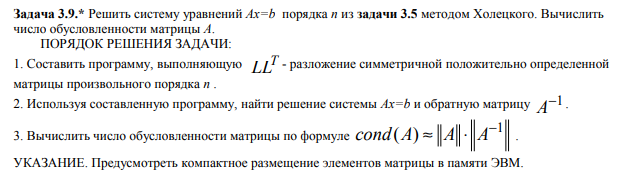

In [51]:
Image("39.png")

In [49]:
n = 50
m = 15
A = np.zeros((n,n))
b = np.zeros(n)
for i in range (1,n+1):
    for j in range (1,n+1):
        if i != j:
            A[i-1][j-1] = (i+j)/(m+n)
        else:
            A[i-1][j-1] = n + m*m + j/m + i/n
    b[i-1] = m*n - i*i*i
L = np.linalg.cholesky(A)
y= np.linalg.solve(L,b)
x = np.linalg.solve(np.transpose(L),y)
if (np.allclose(np.dot(A,x),b)):
    print("Решение системы уравнений")
    print(x)
    print()
C = np.linalg.inv(A)#Находим обратную матрицу
ch = np.linalg.norm(A) * np.linalg.norm(C)
print("Число обусловленности")
print(ch)

Решение системы уравнений
[  14.57969615   14.82028702   15.01717037   15.14857238   15.19273691
   15.12792548   14.93241727   14.58450908   14.06251533   13.34476806
   12.40961683   11.23542883    9.80058873    8.08349877    6.06257866
    3.71626564    1.02301438   -2.03870297   -5.49039683   -9.3535602
  -13.64966869  -18.40018052  -23.62653654  -29.35016025  -35.59245784
  -42.37481816  -49.71861278  -57.64519599  -66.17590483  -75.33205907
  -85.13496127  -95.6058968  -106.7661338  -118.63692327 -131.23949904
 -144.59507781 -158.72485913 -173.65002549 -189.39174226 -205.97115775
 -223.40940323 -241.7275929  -260.94682397 -281.08817666 -302.17271417
 -324.22148276 -347.25551174 -371.29581346 -396.36338339 -422.47920008]

Число обусловленности
50.041706058954055
